# Análise de dados com Python e Pandas
## Aula 5: Análise Exploratória

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
# Habilita o upload do arquivo no colab
#from google.colab import files
#Marq = files.upload()

In [3]:
# Cria o DataFrame e exibe as 5 primeiras linhas
df = pd.read_excel("datasets/AdventureWorks.xlsx")
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [4]:
# Verifica a quantidade de linhas e colunas
df.shape

(904, 16)

In [5]:
# Verifica os tipos de dados de cada coluna
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [6]:
# Verifica a receita total
round(df["Valor Venda"].sum(), 2)

5984606.14

In [7]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [8]:
# Cria um nova coluna Custo
# Verifica o custo total
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])
round(df["Custo"].sum(), 2)

2486783.05

In [9]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [10]:
# Cria uma nova coluna Lucro
# Verifica o lucro total
df["Lucro"] = df["Valor Venda"] - df["Custo"]
round(df["Lucro"].sum(), 2)

3497823.09

In [11]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [12]:
# Cria uma nova coluna com o total de dias para enviar o(s) produto(s) da venda
df["Tempo_Envio"] = df["Data Envio"] - df["Data Venda"]
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


#### Agora, queremos saber a média do tempo de envio para cada Marca, e para isso precisamos transformar a coluna Tempo_Envio em numérica

In [13]:
# Extrai apenas os dias
df["Tempo_Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7


In [14]:
# Verifica o tipo da coluna Tempo_Envio
df["Tempo_Envio"].dtypes

dtype('int64')

In [15]:
# Exibe a média do tempo de envio por marca
df.groupby("Marca")["Tempo_Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_Envio, dtype: float64

### Dados faltantes

In [16]:
# Verifica se temos dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_Envio       0
dtype: int64

#### Verifica o Lucro por Ano e por Marca

In [17]:
# Agrupa os dados por ano e por marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [18]:
pd.options.display.float_format = '{:20,.2f}'.format

In [19]:
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


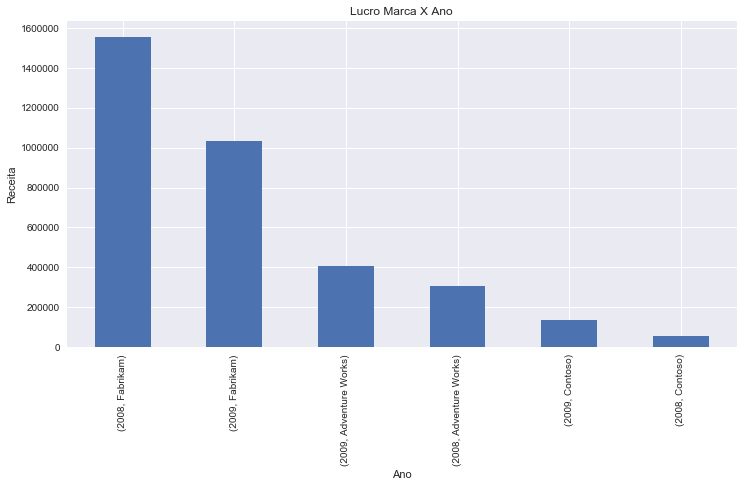

In [39]:
plt.figure(figsize=(12,6))
lucro_ano.groupby(["Data Venda", "Marca"])["Lucro"].sum().sort_values(ascending=False).plot.bar(title="Lucro - Marca X Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [27]:
# Exibe o total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

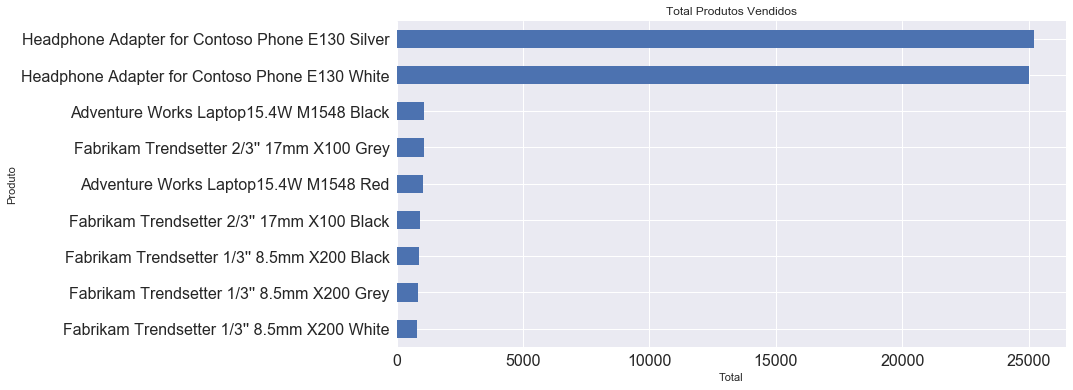

In [33]:
# Plota o gráfico de barras com o total de produtos vendidos
plt.figure(figsize=(12,6))
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos", fontsize=16)
plt.xlabel("Total")
plt.ylabel("Produto");

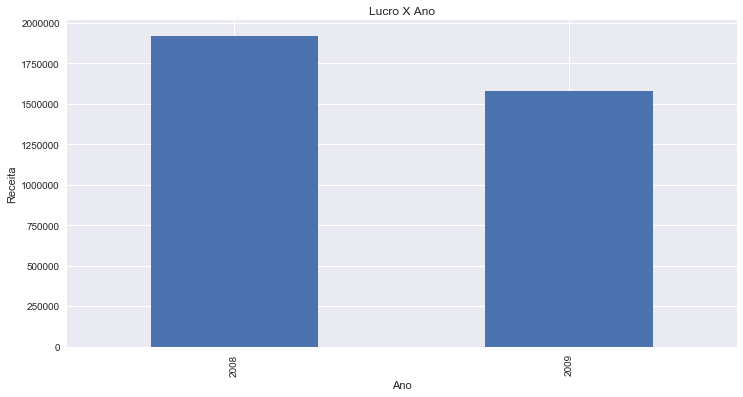

In [31]:
plt.figure(figsize=(12,6))
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro X Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [40]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [45]:
# Filtra vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [50]:
df_2008 = df[df["Data Venda"].dt.year == 2008]

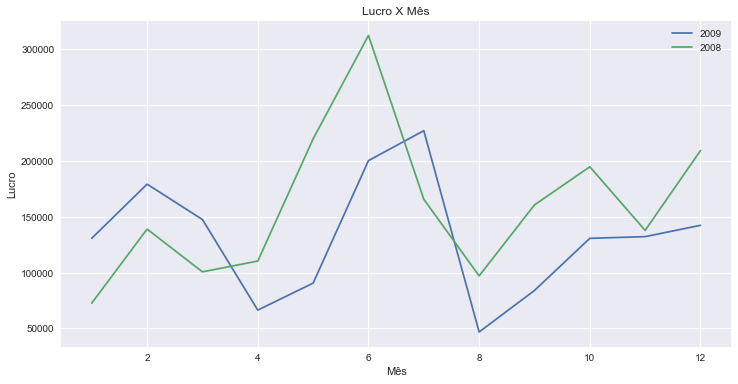

In [53]:
plt.figure(figsize=(12,6))
df_2008.groupby(df_2008["Data Venda"].dt.month)['Lucro'].sum().plot(title="Lucro X Mês", label="2008")
df_2009.groupby(df_2009["Data Venda"].dt.month)['Lucro'].sum().plot(title="Lucro X Mês", label="2009")
plt.xlabel("Mês")
plt.ylabel("Lucro")
plt.legend();

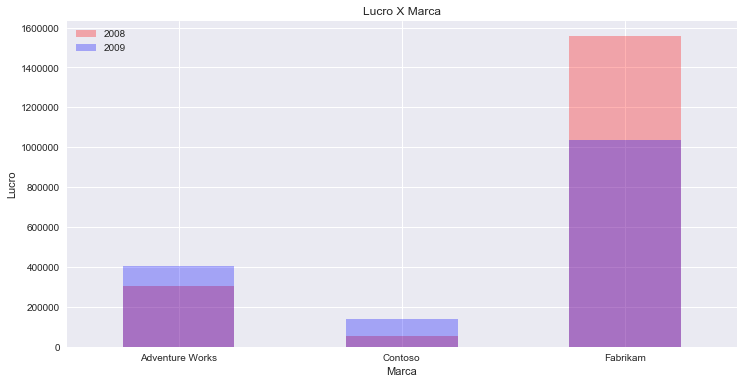

In [75]:
plt.figure(figsize=(12,6))
df_2008.groupby("Marca")['Lucro'].sum().plot.bar(title="Lucro X Marca", label="2008", color="red", alpha=0.3)
df_2009.groupby("Marca")['Lucro'].sum().plot.bar(title="Lucro X Marca", label="2009", color="blue", alpha=0.3)
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.legend()
plt.xticks(rotation="horizontal");

In [77]:
df_2008.groupby("Marca")['Lucro'].sum()

Marca
Adventure Works             306,641.16
Contoso                      56,416.00
Fabrikam                  1,557,020.55
Name: Lucro, dtype: float64

In [76]:
df_2009.groupby("Marca")['Lucro'].sum()

Marca
Adventure Works             405,395.08
Contoso                     138,258.95
Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

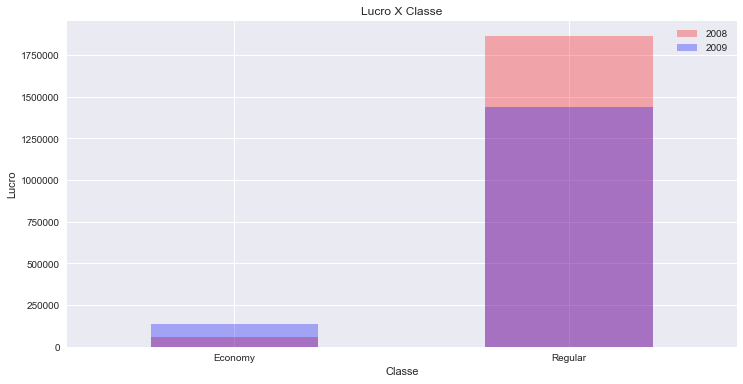

In [82]:
plt.figure(figsize=(12,6))
df_2008.groupby("Classe")['Lucro'].sum().plot.bar(title="Lucro X Classe", label="2008", color="red", alpha=0.3)
df_2009.groupby("Classe")['Lucro'].sum().plot.bar(title="Lucro X Classe", label="2009", color="blue", alpha=0.3)
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.legend()
plt.xticks(rotation="horizontal");

In [79]:
df_2008.groupby("Classe")['Lucro'].sum()

Classe
Economy              56,416.00
Regular           1,863,661.71
Name: Lucro, dtype: float64

In [80]:
df_2009.groupby("Classe")['Lucro'].sum()

Classe
Economy             138,258.95
Regular           1,439,486.43
Name: Lucro, dtype: float64

In [83]:
df["Tempo_Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_Envio, dtype: float64

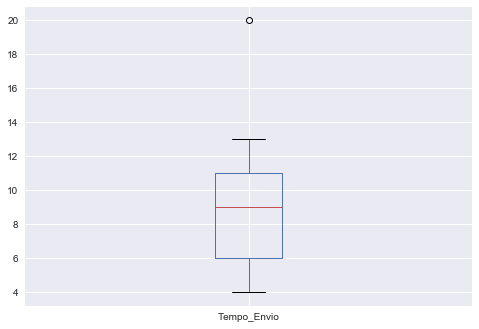

In [86]:
df["Tempo_Envio"].plot.box();

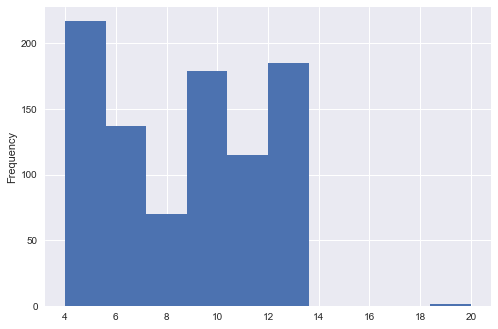

In [89]:
df["Tempo_Envio"].plot.hist();

In [90]:
df["Tempo_Envio"].min()

4

In [91]:
df["Tempo_Envio"].max()

20

In [92]:
df[df["Tempo_Envio"]==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [94]:
df.to_csv("datasets/df_vendas_novo.csv", index=False)

FIM